## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
len(merged_df["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
temp_df = merged_df.groupby("Mouse ID").count()
duplicate_df = temp_df.loc[temp_df["Timepoint"] > 1]
len(duplicate_df)

237

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates("Mouse ID")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen

#create a temp df of the important data
temp_df = merged_df[["Drug Regimen", "Tumor Volume (mm3)"]]

#df then series of the each drugs' means
mean_df = temp_df.groupby("Drug Regimen").mean()
mean_values = mean_df["Tumor Volume (mm3)"]
#df then series of the each drugs' medians
median_df = temp_df.groupby("Drug Regimen").median()
median_values = median_df["Tumor Volume (mm3)"]
#df then series of the each drugs' standard deviations
std_df = temp_df.groupby("Drug Regimen").std()
std_values = std_df["Tumor Volume (mm3)"]
#df then series of the each drugs' SEMs
sem_df = temp_df.groupby("Drug Regimen").sem()
sem_values = sem_df["Tumor Volume (mm3)"]

#putting all series together for a summary broken down by Drug Regimen
summary_df = pd.DataFrame({
    "Mean" : mean_values,
    "Median": median_values,
    "Variance": std_values**2,
    "STD": std_values,
    "SEM": sem_values
})

#using map to format columns
summary_df["Mean"] = summary_df["Mean"].map("{:.2f}".format)
summary_df["Median"] = summary_df["Median"].map("{:.2f}".format)
summary_df["Variance"] = summary_df["Variance"].map("{:.2f}".format)
summary_df["STD"] = summary_df["STD"].map("{:.2f}".format)
summary_df["SEM"] = summary_df["SEM"].map("{:.4f}".format)
summary_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.32,50.85,42.35,6.51,0.5129
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_df.groupby("Drug Regimen").describe()

# This method produces everything in a single groupby function.

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar Plots

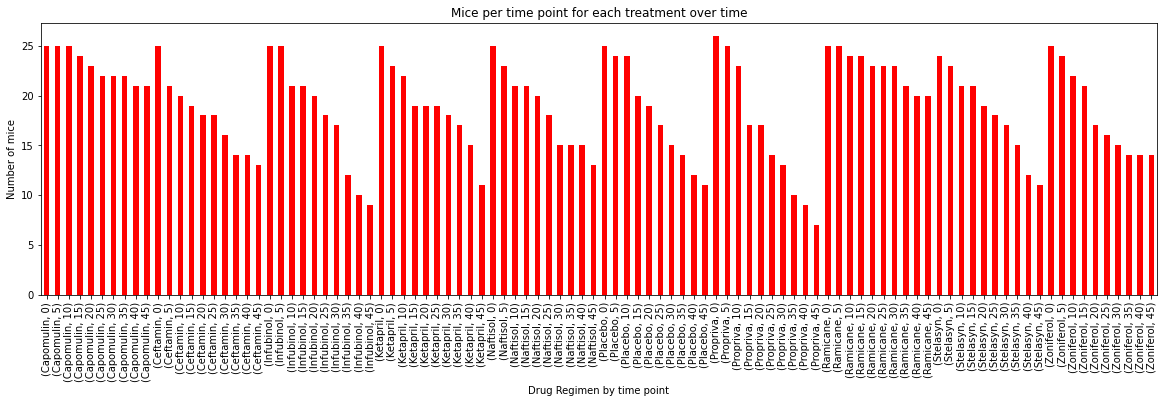

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#gathering all useful data in bar_df
bar_df = merged_df[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]]
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()

#plotting using Pandas
bar_graph = bar_df.plot(kind="bar", figsize=(20,5), title = "Mice per time point for each treatment over time", 
            legend = False, color = "Red")

#setting both x and y labels
bar_graph.set_xlabel("Drug Regimen by time point")
bar_graph.set_ylabel("Number of mice")

plt.show()

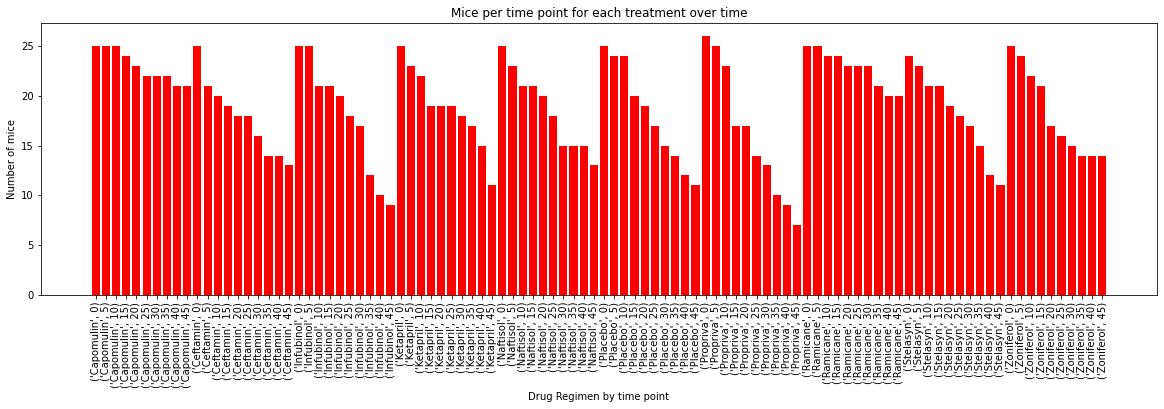

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#gathering all useful data in bar_df
bar_df = merged_df[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]]
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()

#determining size of figure
fig = plt.figure(figsize = (20, 5))
#creating x axis
x_axis = np.arange(0, len(bar_df))

#calling bar chart
plt.bar(x_axis, bar_df["Tumor Volume (mm3)"], color='Red', align="center")

#putting names on x axis
tick_locations = []
for x in x_axis:
    tick_locations.append(x)    
plt.xticks(tick_locations, bar_df.index, rotation = 90)

#adding title and x and y axis labels
plt.title("Mice per time point for each treatment over time")
plt.xlabel("Drug Regimen by time point")
plt.ylabel("Number of mice")

plt.show()

## Pie Plots

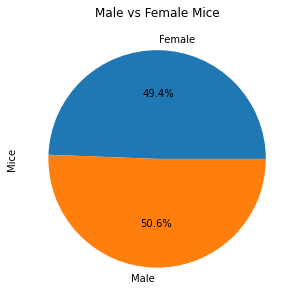

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#only using the most important data
sex_df = merged_df[["Sex", "Mouse ID"]]
#renaming column to represent Mice in general, not specific ID's
sex_df = sex_df.rename(columns = {"Mouse ID": "Mice"})
sex_df= sex_df.groupby(["Sex"]).count()
#calling the plot and adding title
sex_df.plot(kind = "pie", y = "Mice", figsize=(5, 5), title = "Male vs Female Mice", legend = False, 
           autopct = "%1.1f%%")

plt.show()

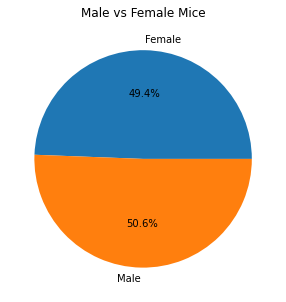

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#only using the most important data
sex_df = merged_df[["Sex", "Mouse ID"]]

#create df grouped by sex and counted, then renamed column accordingly
sex_df= sex_df.groupby(["Sex"]).count()
sex_df = sex_df.rename(columns = {"Mouse ID" : "Counts"})

#defining size of figure
fig = plt.figure(figsize = (5,5))

#call the pie plot
plt.pie(sex_df["Counts"], labels = sex_df.index, autopct = "%1.1f%%")

#add title
plt.title("Male vs Female Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR 
#and quantitatively determine if there are any potential outliers. 

#create df of the last entry of each of the mices' entries
final_df = merged_df.drop_duplicates("Mouse ID", keep = "last")
final_df = final_df[["Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]

#filter so only using mice that made it to the end
final_df = final_df[final_df["Timepoint"] == 45]


#group by Drug regimen and find the mean volumes for each tumor
grouped_df = final_df.groupby("Drug Regimen").mean()
#sort by tumor volumes
grouped_df = grouped_df.sort_values("Tumor Volume (mm3)", ascending = True)
grouped_df = grouped_df.reset_index()

#use for and if loops to determine the drugs from most promising to least
top_four = []
for x in grouped_df["Drug Regimen"]:
    if x not in top_four:
        top_four.append(x)
#only keep the top 4 treatments
top_four = top_four[0:4]


#df of only the best drug regimens and final entry of mice entry
best_drugs_df = final_df[final_df["Drug Regimen"].isin(top_four)]

#create functions for the top four drugs in the study
best_one_df = best_drugs_df[best_drugs_df["Drug Regimen"] == top_four[0]]
best_two_df = best_drugs_df[best_drugs_df["Drug Regimen"] == top_four[1]]
best_three_df = best_drugs_df[best_drugs_df["Drug Regimen"] == top_four[2]]
best_four_df = best_drugs_df[best_drugs_df["Drug Regimen"] == top_four[3]]

def outlier_fun(df):
    #create quartiles, iqr, and upper and lower bounds
    quartiles = df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #creating df of the possible outliers
    outliers = df.loc[(df["Tumor Volume (mm3)"] > upper_bound) | (df["Tumor Volume (mm3)"] < lower_bound)]
    #prints relevant information
    print(f'For drug {df.iloc[0,0]}, the IQR is: {round(iqr,2)} and there are {len(outliers)} potential outliers.')
    
outlier_fun(best_one_df)
outlier_fun(best_two_df)
outlier_fun(best_three_df)
outlier_fun(best_four_df)

For drug Ramicane, the IQR is: 7.53 and there are 0 potential outliers.
For drug Capomulin, the IQR is: 7.78 and there are 0 potential outliers.
For drug Ceftamin, the IQR is: 6.09 and there are 0 potential outliers.
For drug Infubinol, the IQR is: 4.93 and there are 0 potential outliers.


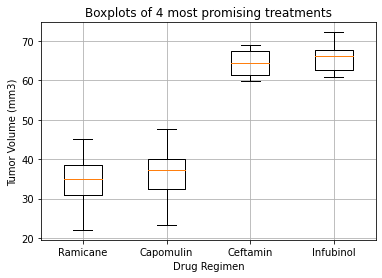

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#create data to plot
labels = [best_one_df.iloc[0,0], best_two_df.iloc[0,0], best_three_df.iloc[0,0], best_four_df.iloc[0,0]]
data_to_plot = [best_one_df["Tumor Volume (mm3)"], 
                best_two_df["Tumor Volume (mm3)"],
               best_three_df["Tumor Volume (mm3)"],
               best_four_df["Tumor Volume (mm3)"]]
#call boxplot
plt.boxplot(data_to_plot,
            positions = [1, 2, 3, 4],
            labels = labels)
plt.title("Boxplots of 4 most promising treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()

## Line and Scatter Plots

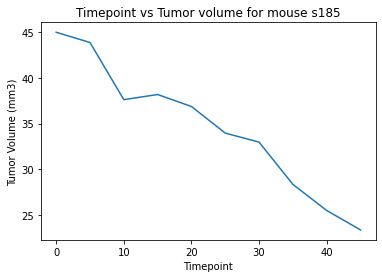

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#creating df with only the important columns
line_df = merged_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]

#df of all mice and timepoints with only capomulin drug regimen
capo_df = line_df[merged_df["Drug Regimen"] == "Capomulin"]

#the first mouse with capomulin drug
single_mouse_name = capo_df.iloc[0,0]

#df that includes only one mouse who had the capomulin drug regimen
single_mouse_df = capo_df[capo_df["Mouse ID"] == single_mouse_name]

#simplify df so that we only have Timepoint and Tumor volume columns
single_mouse_df = single_mouse_df.drop(single_mouse_df[["Mouse ID", "Drug Regimen", "Weight (g)"]], axis = 1)
single_mouse_df = single_mouse_df.set_index("Timepoint")

#call line plot
ax = single_mouse_df.plot(kind = "line", legend = False, 
                     title = f'Timepoint vs Tumor volume for mouse {single_mouse_name}')
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

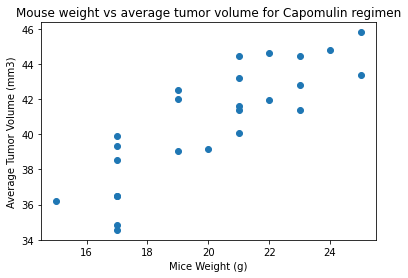

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#pull in the most important data
scatter_df = capo_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]  

#groupby Mouse ID and find the mean
scatter_df = scatter_df.groupby("Mouse ID").mean()

#assign x and y variables
weights = scatter_df["Weight (g)"]
volumes = scatter_df["Tumor Volume (mm3)"]

#call scatter plot
plt.scatter(weights, volumes)
plt.title("Mouse weight vs average tumor volume for Capomulin regimen")
plt.xlabel("Mice Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

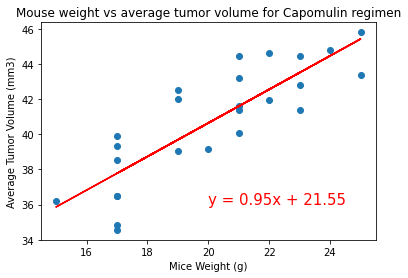

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#find the values to create linear regression line
wv_slope, wv_int, wv_r, wv_p, wv_st_err = st.linregress(weights, volumes)
regress_values = wv_slope*weights + wv_int
line_eq = f'y = {round(wv_slope, 2)}x + {round(wv_int,2)}'

#call the scatter plot
plt.scatter(weights, volumes)
#plots the linear regression line
plt.plot(weights, regress_values, "red")
#displays the linear regression line equation
plt.annotate(line_eq, (20,36), fontsize = 15, color = "red")
plt.title("Mouse weight vs average tumor volume for Capomulin regimen")
plt.xlabel("Mice Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [20]:
#Write at least 3 observations or inferences from the plots
# number at the end
print("1: Looking at both the barplots and boxplots,  Ramicane is comparable to Capomulin in effectiveness.")
print("2: Ramicane and Capomulin are noticably better that the next best 2 drug regimens.")
print("3: The larger the mouse is in weight, the larger the tumor will be volume.")

1: Looking at both the barplots and boxplots,  Ramicane is comparable to Capomulin in effectiveness.
2: Ramicane and Capomulin are noticably better that the next best 2 drug regimens.
3: The larger the mouse is in weight, the larger the tumor will be volume.
